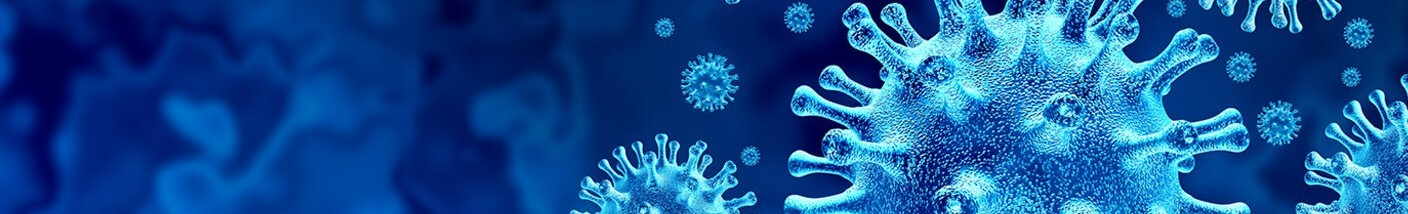

# **A Virus With No Boundaries: Visualizing COVID-19's Impact on the World**

McKayla Hagery

mhage001@odu.edu

https://www.mckaylahagerty.com/

# Abstract

The first case of COVID-19 was reported in Wuhan City, China but the virus quickly spread, ultimately impacting the globe. Each country's government faced the challenge of best dealing with the pandemic. In addition to government intervention methods, countries have dealt with their own baseline combination of population, infrastructure, socio-economic, and health factors. 

Tasks of this report and questions to be answered:

* Merge and clean the datasets.
* Create interactive world maps and line charts to investigate daily cases, death, and stringency index by country.
* Describe the world trends in cases, deaths, and stringency index. Note any interesting country specific trends. 
* Create a scatterplot to intuitively show mortality rate.
* Identify countries of interest throughout exploration to investigate towards the end of the report.
* Consider potential correlations between government intervention and lower cases, deaths, or death rates.
* Hypothesize some potential reasons for the COVID-19 impact on each identified country of interest.

Two sets of data will be used together to investigate the questions above: 

1.   Country Stringency Data (from the University of Oxford) - This dataset includes 17 indicators from 4 categories (containment and closure policies, economic policies, health system policies, miscellaneous policies) that are factors towards the overall stringency index.
2.   Country and COVID Data (from Our World In Data) - This dataset includes cases, deaths, and testing data over time as well as various health and socio-economic indicators. 

Note that it was decided that this data was better suited to support a project that demonstrates cleaning, general analysis, and visualizations more so than one with a machine learning focus. The data is at a country level rather than an individuals or counties level and there are an extensive number of variables that play a significant role in the makeup of all aspects of countries, many of which are not included in either dataset below. While basic potential correlation will be investigated, there are many factors that should be considered. Information on many of these factors is still being collected and is under ongoing analysis as the pandemic continues. Likewise, because each country in responsible for reporting their own data, some inconsistencies in how data is collected and reported can be expected. This project is for exploratory, educational purposes only. 




# Data

In [1]:
from google.colab import drive
import pandas as pd
from datetime import datetime
import branca.colormap as cm
import folium
!pip install geopandas
import geopandas as gpd
import numpy as np
from folium.plugins import TimeSliderChoropleth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 14.8MB 318kB/s 
     |████████████████████████████████| 6.5MB 50.3MB/s 


In [2]:
#Scrolling view of dataframe output. 
pd.set_option('expand_frame_repr', False)

## Country and COVID-19 Dataset

In [3]:
#Mounting Google Drive to import data.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Country and COVID-19 Data: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/bsg/COVID%20Government%20Response%20(OxBSG).csv

Source: https://ourworldindata.org/coronavirus

Codebook: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [4]:
#Importing covid country data.
ccdata=pd.read_csv('gdrive/My Drive/CS620 Project/Country and COVID-19 Data.csv')
ccdata.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,1/23/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,1/24/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,1/25/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,1/26/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,1/27/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,1/28/2020,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,1/29/2020,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,1/30/2020,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,1/31/2020,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2/1/2020,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [5]:
#Using sample to get a better picture of the data.
#ccdata.sample(10)

## Country Stringency Dataset


Country Stringency Data: https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv

Source: https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker#data

Codebook: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

In [6]:
#Import country stringency data.
strdata=pd.read_csv('gdrive/My Drive/CS620 Project/Country Stringency Data.csv')
strdata.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200106,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200107,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200108,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200109,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200110,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Also using sample to get a better picture of the data
#strdata.sample(10)

# Cleaning and Merging

In [8]:
ccdata.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,1/23/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,1/24/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,1/25/2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [9]:
strdata.head(3)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Choosing two datasets that needed merged provided the opportunity to demonstrate some of the data manipulation and cleaning methods learned in class. 

## Preparing to Merge

The work begins with making sure the columns which will be used to merge the data are exactly labeled the same. 

In [10]:
#Renaming the country and date columns in both datasets for consistency and easy of combining later.
ccdata.rename(columns={'location': 'Country'}, inplace=True)
strdata.rename(columns={'CountryName': 'Country'}, inplace=True)
ccdata.rename(columns={'date': 'Date'}, inplace=True)

Since one of those columns to be used to combine the two datasets is the date column, attention is also given to the date data types and formats which are both converted using the datetime package.

In [11]:
#Adjust date format so both datasets match. First, we confirm the current data types.
strdata['Date'].dtypes

dtype('int64')

In [12]:
ccdata['Date'].dtypes

dtype('O')

In [13]:
#Now, changing the date columns to datetime format.
strdata['Date'] = pd.to_datetime(strdata['Date'], format='%Y%m%d')
#strdata.head()
#strdata.shape

In [14]:
ccdata['Date'] = pd.to_datetime(ccdata['Date'], format='%m/%d/%Y')
#ccdata.head()
#ccdata.shape

To merge, the unique list of countries in each dataset is extracted and saved as separate lists. A similar process is used to get the list of unique countries that are in both lists. The original datasets are then reduced to the countries on that list. Inner join could have also been used to shorten this process. I decided on a more hands on approach with this merge and will use a condensed approach later in the project.  

In [15]:
#List and alphabetically sort the country from each dataset for easy reference and for finding common countries.
unique_ccdata=sorted(ccdata['Country'].unique())
print(unique_ccdata)
len(unique_ccdata)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'International', 'Iran', 'Iraq

192

In [16]:
#Save only rows that have common countries from both datasets
unique_strdata=sorted(strdata['Country'].unique())
print(unique_strdata)
len(unique_strdata)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Ital

182

In [17]:
#First finding common countries.
commonCountries = set(unique_ccdata) & set(unique_strdata)
len(commonCountries)
#convert set to list
commonCountries = list(commonCountries)
print(sorted(commonCountries))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuw

In [18]:
#Save only rows that have common countries from both datasets
cleaned_ccdata = ccdata.loc[ccdata['Country'].isin(commonCountries)]
#cleaned_ccdata.head()
#ccdata.shape

In [19]:
#Save only rows that have common countries from both datasets
cleaned_strdata = strdata.loc[strdata['Country'].isin(commonCountries)]
#cleaned_strdata.head(10)
#strdata.shape

## Merging the Datasets

In [20]:
#Merge the two datasets by country and date.
df = pd.merge(cleaned_strdata, cleaned_ccdata, on=["Country","Date"])

In [21]:
# Checking to make sure the resulting dataframe is as expected. 
print(df.shape)
df.head(5)

(77483, 95)


,Country,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,...,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-23,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-24,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-25,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-26,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-01-27,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [22]:
(df[df.CountryCode.notnull()]).shape

(77483, 95)

## Additional Cleaning

It was discovered that full United States country data is included along with state data. For the purpose of the goals of this project, the individual state data is not needed so it can be removed.

In [23]:
#The rows with RegionName value other than NaN are rows for individual Unites States states. These rows will be removed. 
df = df[~df['RegionName'].notna()]
#The remaining United states rows are an average for the country. We are only interested in full country data.  

As seen in the previous section, our merged data frame has 95 columns. Most of these will be kept in order to not unknowingly remove helpful or interesting variables, but it was decided that a set of columns can safely be dropped.

In [24]:
#Removing the Flag columns.
df=df.drop(columns=['Jurisdiction','C1_Flag', 'C2_Flag','C3_Flag','C4_Flag','C5_Flag','C6_Flag','C7_Flag','E1_Flag','H1_Flag','H6_Flag'])

A final step in this initial cleaning is checking for any obvious typographical errors. The below summary statistics can assist in this.

In [25]:
#To see if the data has any obvious typographical errors, I'll look at the variables and determine any data outside what would be expected.
df.describe() 

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,51216.000000,50908.000000,50907.000000,50906.000000,50901.000000,50908.000000,51200.000000,51217.000000,50912.000000,50897.000000,5.081100e+04,5.120300e+04,51194.000000,51177.000000,51175.000000,5.112300e+04,5.111800e+04,51430.000000,0.0,5.182100e+04,51821.000000,50901.000000,50901.000000,50901.00000,50901.00000,50893.000000,50893.000000,50894.000000,50894.000000,50894.000000,50894.000000,4.446300e+04,51744.000000,50904.000000,38687.000000,51744.000000,50904.000000,44463.000000,51744.000000,50904.000000,38687.000000,51744.000000,50904.000000,37077.000000,4659.000000,4659.00000,5126.000000,5126.000000,410.000000,410.000000,693.000000,693.000000,2.238800e+04,2.224400e+04,22388.000000,22244.000000,2.492200e+04,24922.000000,23709.000000,23141.000000,50901.000000,5.186700e+04,50936.000000,50327.000000,49704.000000,50019.000000,50012.000000,35157.000000,50873.000000,50936.000000,41010.000000,40394.000000,25913.000000,45938.000000,51559.000000,50320.000000
mean,1.847040,1.376012,1.369556,2.363769,0.598338,0.980966,0.938281,2.610852,0.764987,0.952925,2.100813e+08,1.757469e+07,1.758214,1.545694,1.280879,1.245679e+07,6.031281e+05,1.735952,NaN,9.633739e+04,3170.633450,53.096496,53.096496,59.38315,59.38315,51.103775,51.103775,52.964271,52.964271,39.946261,39.946261,1.124010e+05,1159.633755,1145.017867,4248.765942,27.349490,27.188242,3209.481029,36.045293,35.377910,98.512784,0.674348,0.663622,1.050512,799.937970,15.61126,4403.991611,93.896082,252.844954,8.800110,2457.017346,73.474599,2.591545e+06,3.073566e+04,83.377306,0.929797,2.974026e+04,0.919434,0.070492,180.000030,53.096496,4.598067e+07,317.345140,30.235712,8.651131,5.479763,18932.267384,13.806798,258.321421,7.698607,10.230278,31.817421,49.374601,2.947437,72.835734,0.707287
std,1.226475,1.052816,0.841043,1.618196,0.755062,0.945513,0.921868,1.346914,0.781670,0.849964,1.266812e+10,3.690755e+09,0.598626,0.941519,0.785273,1.229710e+09,4.258056e+07,1.509362,NaN,5.570930e+05,15275.348448,27.954104,27.954104,28.31622,28.31622,24.363885,24.363885,25.162149,25.162149,32.855337,32.855337,6.000699e+05,6309.576798,6037.610003,17552.075896,132.501628,122.291971,6635.202402,116.001458,96.378877,195.295711,2.867671,2.021841,0.383960,2165.988262,21.70283,10884.901868,137.132948,557.103383,21.122886,5995.966857,226.365645,1.168739e+07,1.232648e+05,172.681581,1.782774,1.138342e+05,1.651

The max values seem much higher than would be expected for any one country. It is found that world data is included here. That can be removed and easily recreated from all the other country data later if needed.

In [26]:
#Removing world data.
df = df[df.Country != 'world']

There is not a column specifically stating death rate, but it can be created using deaths and cases. New fatality rate is the daily death rate calculated by dividing the new daily deaths by the new cases. The total mortality rate is the current death rate considering all deaths and cases. 

In [27]:
#Add column for mortality rate.
df['total_fatal_rate'] = df['total_deaths'] / df['total_cases'] 
df['new_fatal_rate'] = df['new_deaths'] / df['new_cases'] 

# World Analysis

The report will follow a general path from broader to narrower analysis. First, all world data will be visualized and examined. Later, specific countries will be considered as several smaller, strategically chosen groups for analysis.

In [28]:
#Summary data for the world. This will need to be used carefully. Divide by 158 when full count is not wanted (like for rates).
df_world_summary = df.groupby('Date', as_index=False).sum()

df_world_summary['new_cases_smoothed_per_million'] = df_world_summary['new_cases_smoothed_per_million'].div(158)
df_world_summary['new_tests_smoothed_per_thousand'] = df_world_summary['new_tests_smoothed_per_thousand'].div(158)
df_world_summary['positive_rate'] = df_world_summary['positive_rate'].div(158)
df_world_summary['stringency_index'] = df_world_summary['stringency_index'].div(158)
df_world_summary['total_fatal_rate'] = df_world_summary['total_fatal_rate'].div(158)
df_world_summary['new_deaths_smoothed_per_million'] = df_world_summary['new_deaths_smoothed_per_million'].div(158)

#Summary data by country.
df_country_summary = df.groupby('Country',as_index=False).mean()

#Each country most recent day 
df_most_recent_day = df.sort_values('Date').groupby('Country').apply(lambda x: x.tail(1))


## Interactive Maps

For the purpose of best visualizing the general trend of key statistics for the full world, over time, and within each country, choropleth world maps are created. An interactive slider for date is essential to seeing trends over time and COVID-19 activity on specific dates. These maps can be referred to while reading other sections of the report as needed. Since the maps show country specific data, an additional line graph for world full world data retains the big picture understanding. In order to identify to later examine countries with out of the ordinary key statistics, an additional multi line chart by country will be included below each map.

In [29]:
countries = gpd.read_file('gdrive/My Drive/CS620 Project/shapefile/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shx')
countries.rename(columns={'CNTRY_NAME': 'Country'}, inplace=True)
#countries.head()

In [30]:
#The countries in the shapefile
unique_countries=sorted(countries['Country'].unique())
print(unique_countries)
len(unique_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Byelarus', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Islas Malvinas)', 'Faroe Islands', 'Federate

251

In [31]:
#The countries in the merged, cleaned dataset
unique_df=sorted(df['Country'].unique())
print(unique_df)
len(unique_df)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuw

169

In [32]:
#The countries in the our cleaned, merged dataset that are also in the shapefile. These are the only countires we'll keep in our dataset.
new_unique_countries=list(filter(lambda x: x in unique_countries , unique_df))
print(new_unique_countries)
print(len(new_unique_countries))
new_unique_countries=list(new_unique_countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar

In [33]:
def returnNotMatches(a, b):
    return [x for x in a if x not in b]

drop_countries=returnNotMatches(unique_df, new_unique_countries)
print(drop_countries)

['Bahamas', 'Belarus', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Gambia', 'Hong Kong', 'Kosovo', 'Myanmar', 'Palestine', 'South Sudan', 'Tanzania']


In [34]:
#This is the new cleaned, merged data. Only counties that we have shapefile information for are included. 
df=df.loc[~df['Country'].isin(drop_countries)]
#Drop columns: 
df=df.drop(columns=['RegionName', 'RegionCode'])
#df.head(10)

In [35]:
df0 = df.fillna(0)

In [36]:
merged_df0 = pd.merge(df0, countries, on=["Country"])
merged_df0['date_sec'] = pd.to_datetime(merged_df0['Date']).astype(int) / 10**9
merged_df0['date_sec'] = merged_df0['date_sec'].astype(int).astype(str)

In [37]:
mymap = folium.Map(tiles='cartodbpositron')
mymap.save(outfile='infinite_scroll.html')
mymap_fix_boundary = folium.Map(min_zoom=2, max_bounds=True, tiles='cartodbpositron')
mymap_fix_boundary.save(outfile='fix_boundary.html')

### New Daily Cases Smoothed by Country

In [38]:
#Choosing the data to be displayed.
max_colour = max(merged_df0['new_cases_smoothed_per_million'])
min_colour = min(merged_df0['new_cases_smoothed_per_million'])
cmap = cm.linear.YlGnBu_09.to_step(10).scale(0,500)
merged_df0['Testing_colour'] = merged_df0['new_cases_smoothed_per_million'].map(cmap)

In [39]:
country_list = merged_df0['Country'].unique().tolist()
country_idx = range(len(country_list))

style_dict = {}
for i in country_idx:
    country = country_list[i]
    result = merged_df0[merged_df0['Country'] == country]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['date_sec']] = {'color': r['Testing_colour'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict

In [40]:
countries_df0 = merged_df0[['geometry']]
countries_gdf0 = gpd.GeoDataFrame(countries_df0)
countries_gdf0 = countries_gdf0.drop_duplicates().reset_index()

In [41]:
slider_map = folium.Map(min_zoom=2, max_bounds=True,tiles='cartodbpositron')

_ = TimeSliderChoropleth(
    data=countries_gdf0.to_json(),
    styledict=style_dict,).add_to(slider_map)

_ = cmap.add_to(slider_map)

cmap.caption = "New Daily Cases Per Million (7 Day Average)"
slider_map.save(outfile='gdrive/My Drive/CS620 Project/TimeSliderChoropleth.html')

Text(0, 0.5, 'New Cases/Million/Day')

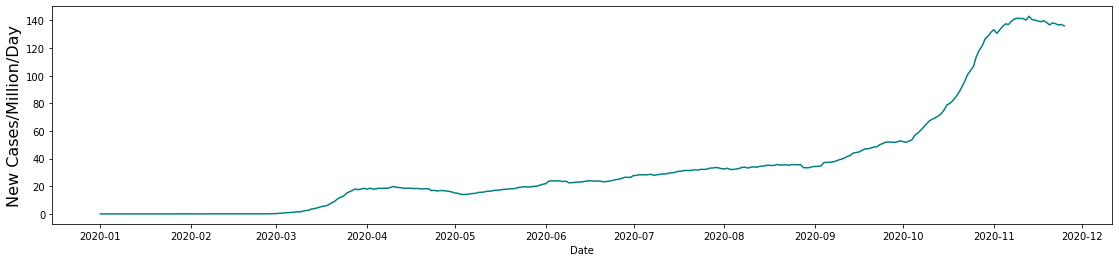

In [42]:
#Creating the suplimental line chart. 
plt.figure(figsize=(19,4))
plt.xlabel(None)
cases = sns.lineplot(x='Date', y='new_cases_smoothed_per_million', data = df_world_summary, color='teal').set_ylabel('New Cases/Million/Day', fontsize=16)
cases

In [43]:
slider_map

Output hidden; open in https://colab.research.google.com to view.

The map shows the 7-day average of new daily cases per million people. Lighter yellow colors represent less cases per million. As the colors become teal and ultimately dark blue, more cases per million have been reported. Throughout the project, a preference is typically given to data as it relates to population size. For instance, a map with cases rather than cases per million would inaccurately portray a larger COVID-19 problem in more populated countries and less COVID-19 in smaller countries. In order to more responsibly compare country cases, we must use new_cases_smoothed_per_million. 

The line graph indicates a few things from the world perspective: 
* The initial spike in daily cases occurred throughout the second half of March.
* From the beginning of May through the beginning of September, daily cases increased steadily but at a significantly slower rate in comparison to September through the beginning of November. 

The map shows some important information:
* Europe sees cases earlier than the United States.
* By the end of May, most European countries have less than 20 daily cases per million people. During this same time, the United States has 60 to 80 cases per million people and most South American countries are being affected by COVID-19. The most impacted South American countries are on the western coast. 
* Europe retains low daily COVID-19 cases through May, June, and July while the Americas see an increase in daily cases.
* Throughout September, western Europe sees a spike in cases, surpassing The United States’ daily rates.
* By mid to late October, the map fills in with darker colors meaning more daily cases across many cases around the world. 
* By the end of November, most reporting countries are blue in color, indicating a worldwide problem in new cases. This is supported by the line chart.
* Canada, which was notably less impacted by cases for much of the early pandemic, also started to see a rise in cases through November. 
* Africa does not seem to follow the case numbers patters set by other countries. Some areas saw spikes but by late November, most reporting African countries see less than half the number of cases in Europe and the United States.




In [44]:
# Used Plotly for increased interactivity. 
fig = px.line(df0, x='Date', y='new_cases_smoothed_per_million', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Countries of interest: 
1. Belgium - highest cases per million day of any other country at the end of October.
2. Italy - also high case rate currently.

### Testing by Country

In [45]:
#Choosing new deaths as our data of interest.

max_colour = max(merged_df0['new_tests_smoothed_per_thousand'])
min_colour = min(merged_df0['new_tests_smoothed_per_thousand'])
cmap = cm.linear.YlGnBu_09.to_step(10).scale(0,6)
merged_df0['Testing_colour'] = merged_df0['new_tests_smoothed_per_thousand'].map(cmap)

country_list = merged_df0['Country'].unique().tolist()
country_idx = range(len(country_list))

style_dict = {}
for i in country_idx:
    country = country_list[i]
    result = merged_df0[merged_df0['Country'] == country]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['date_sec']] = {'color': r['Testing_colour'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict

countries_df0 = merged_df0[['geometry']]
countries_gdf0 = gpd.GeoDataFrame(countries_df0)
countries_gdf0 = countries_gdf0.drop_duplicates().reset_index()

from folium.plugins import TimeSliderChoropleth

slider_map22 = folium.Map(min_zoom=2, max_bounds=True,tiles='cartodbpositron')

_ = TimeSliderChoropleth(
    data=countries_gdf0.to_json(),
    styledict=style_dict,).add_to(slider_map22)

_ = cmap.add_to(slider_map22)

cmap.caption = "New Daily Tests Per Thousand (7-Day Average)"
slider_map22.save(outfile='gdrive/My Drive/CS620 Project/TimeSliderChoropleth.html')

Text(0, 0.5, 'New Tests per Thousand')


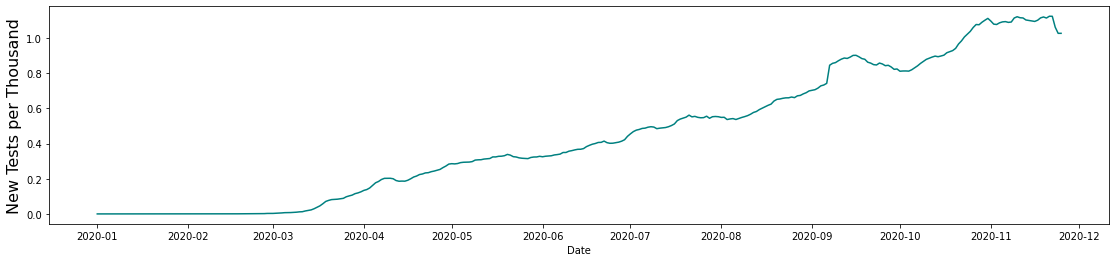

In [46]:
plt.figure(figsize=(19,4))
tests_thou = sns.lineplot(x='Date', y='new_tests_smoothed_per_thousand', data = df_world_summary, color='teal').set_ylabel('New Tests per Thousand', fontsize=16)
print(tests_thou)

In [47]:
slider_map22

Output hidden; open in https://colab.research.google.com to view.

Both visualizations show that more testing has happened each month of the pandemic. This can be observed in North America, Europe, Asia, and Australia. 

In [48]:
# Used Plotly for increased interactivity. 
fig = px.line(df0, x='Date', y='new_tests_per_thousand', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Countries of interest:
1. Luxembourg - has taken a testing heavy approach to lowering transmission.
2. Denmark - another high testing country.
2. Iceland - notably early increase in testing. 

### New Daily Deaths Smoothed by Country

In [49]:
#Choosing new deaths as our data of interest.

max_colour = max(merged_df0['new_deaths_smoothed_per_million'])
min_colour = min(merged_df0['new_deaths_smoothed_per_million'])
cmap = cm.linear.YlGnBu_09.to_step(10).scale(0,15)
merged_df0['Testing_colour'] = merged_df0['new_deaths_smoothed_per_million'].map(cmap)

country_list = merged_df0['Country'].unique().tolist()
country_idx = range(len(country_list))

style_dict = {}
for i in country_idx:
    country = country_list[i]
    result = merged_df0[merged_df0['Country'] == country]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['date_sec']] = {'color': r['Testing_colour'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict

countries_df0 = merged_df0[['geometry']]
countries_gdf0 = gpd.GeoDataFrame(countries_df0)
countries_gdf0 = countries_gdf0.drop_duplicates().reset_index()

from folium.plugins import TimeSliderChoropleth

slider_map2 = folium.Map(min_zoom=2, max_bounds=True,tiles='cartodbpositron')

_ = TimeSliderChoropleth(
    data=countries_gdf0.to_json(),
    styledict=style_dict,).add_to(slider_map2)

_ = cmap.add_to(slider_map2)

cmap.caption = "New Daily Deaths Per Million (7-Day Average)"
slider_map2.save(outfile='gdrive/My Drive/CS620 Project/TimeSliderChoropleth.html')

Text(0, 0.5, 'New Deaths/Million/Day')


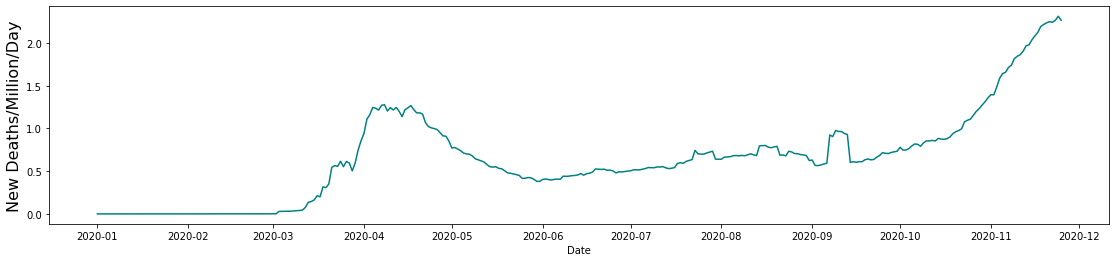

In [50]:
plt.figure(figsize=(19,4))
plt.xlabel(None)
cases = sns.lineplot(x='Date', y='new_deaths_smoothed_per_million', data = df_world_summary, color='teal').set_ylabel('New Deaths/Million/Day', fontsize=16)
print(cases)

In [51]:
slider_map2

Output hidden; open in https://colab.research.google.com to view.

Here the smoothed per million data is used as well for more accurate comparisons on the changing deaths over time. 

Findings from the line chart include:
* Reported deaths in the world are first reported at the start of March with a spike in deaths mid-March through mid-April. 
* The worldwide cases dropped from around 1.4 deaths per million people per day to around 0.6 deaths per million people per day between mid-April through the start of June. 
* From there, deaths began to rise with 0.9 deaths per million people per day by mid-October.
* Mid October to mid-November saw the greatest increase in deaths for the world. 

The map reveals more about what areas saw the most deaths per million people:
* Spain, France, Italy, and the United Kingdom, who had 1 or less reported deaths per day per million through March 11, faced early struggles with their deaths which climbed to more than 14 new deaths per day per million people by April 11.
* During this same time, the United States' deaths increase to 5 to 6 deaths per million per day. 
* By mid-May, Europe reports lower deaths, between 1 and 4 per million per day. Likewise, the Americas report deaths per million per day as around 1 to 4.
* The map for June through September is mostly pale yellows indicating low deaths per million. The exception to this is with South America whose deaths per million in some areas oscillated between 1 and 15+ deaths per million per day during this time period. Some of the reportedly most impacted areas included Bolivia, Ecuador, Peru, and Chile.
* Throughout November the darker colors reappear, mainly in Europe, but there is indication that the United States' deaths have increased by late November.


In [52]:
fig = px.line(df0, x='Date', y='new_deaths_smoothed_per_million', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Countries of interest:
1. San Marino - highest new deaths per million in the early days of the pandemic, much higher than any other reporting country. 

### Stringency Index by Country

In [53]:
max_colour = max(merged_df0['stringency_index'])
min_colour = min(merged_df0['stringency_index'])
cmap = cm.linear.YlGnBu_09.to_step(10).scale(0,100)
merged_df0['Testing_colour'] = merged_df0['stringency_index'].map(cmap)

country_list = merged_df0['Country'].unique().tolist()
country_idx = range(len(country_list))

style_dict = {}
for i in country_idx:
    country = country_list[i]
    result = merged_df0[merged_df0['Country'] == country]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['date_sec']] = {'color': r['Testing_colour'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict

countries_df0 = merged_df0[['geometry']]
countries_gdf0 = gpd.GeoDataFrame(countries_df0)
countries_gdf0 = countries_gdf0.drop_duplicates().reset_index()

slider_map3 = folium.Map(min_zoom=2, max_bounds=True,tiles='cartodbpositron')

_ = TimeSliderChoropleth(
    data=countries_gdf0.to_json(),
    styledict=style_dict,).add_to(slider_map3)

_ = cmap.add_to(slider_map3)

cmap.caption = "Stringency Index"
slider_map3.save(outfile='gdrive/My Drive/CS620 Project/TimeSliderChoropleth.html')

Text(0, 0.5, 'Combined World Stringency Index')


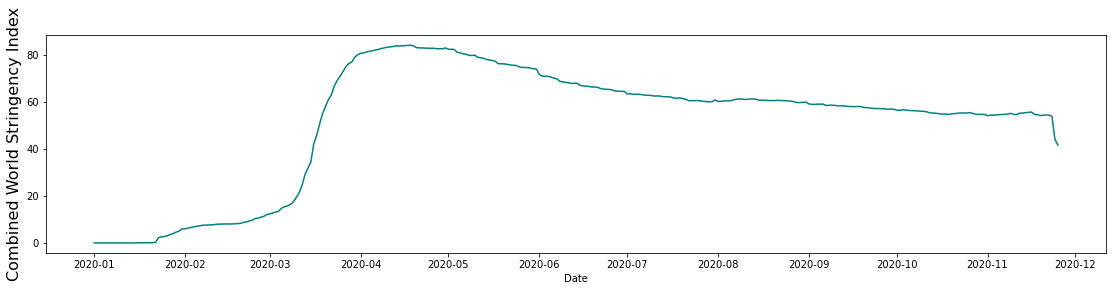

In [54]:
plt.figure(figsize=(19,4))
str_index = sns.lineplot(x='Date', y='stringency_index', data = df_world_summary,  color='teal').set_ylabel('Combined World Stringency Index', fontsize=16)
print(str_index)

In [55]:
slider_map3

Output hidden; open in https://colab.research.google.com to view.

The line chart and map show the stringency index data. The Government Response Stringency Index is a composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 with 100 being the strictest response. 

The line chart findings:
* Government response increased sharply throughout March.
* Between mid-April and late November, world restrictions appear to have been lifted slowly. 

The map provides some additional insight. Note that the virus did not spread to the entire world at the same time so some differences in the initial implementation of government restrictions are expected:
* The first countries to implement restrictions were China and Mongolia. From January through mid-February, these were the only areas with any significant restrictions. 
* The next country to report a significant increase in restrictions was Italy.
* By March 15, many world governments had begun to take actions to prevent or slow the spread of COVID-19. 
* According to the map, some areas slower with restriction implementation were Mexico, the United Kingdom, and much of Africa. However, by the beginning of April there were very few areas with a stringency index of less than 50.
* Note that it appears the United States never had a stringency index above 80. This contrasts with most European and Asian countries which had a stringency index of 80+, at least for a brief period.
* Starting in May, a slow lift in restrictions begins in some areas. Much of Asia began increasing restrictions again through September. By October, much of Europe and parts of Africa saw a stringency index of between 10 and 50.
* Throughout October and November, some of the southern portions of Africa and eastern South America began to lift restrictions while many European, Asian, and North American countries starting increasing restrictions again.


In [56]:
fig = px.line(df0, x='Date', y='stringency_index', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Countries of interest:
1. Chile and Australia - highest restriction ratings as of November 22.
2. Also, separating by continent reveals that Europe had a distinctive approach of strict regulations followed a steady decrease in regulations for several months. In contrast, most of South America continued to have a stringency index of above 75 through those months.


## Other Visualizations

### World Cases, Deaths, Testing, and Hospitalizations

Below are world line charts, some of which are also above and some that are new. They are stacked on one another to get a sense of the progression on the virus around the world.

Text(0, 0.5, 'New Cases per Million')
Text(0, 0.5, 'New Tests per Thousand')
Text(0, 0.5, 'Positive Test Rate')
Text(0, 0.5, 'Overall Mortality Rate')
Text(0, 0.5, 'Hospital Patients')
Text(0, 0.5, 'Stringency Index')


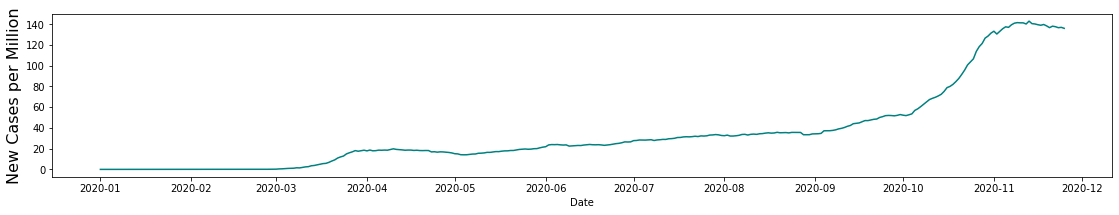

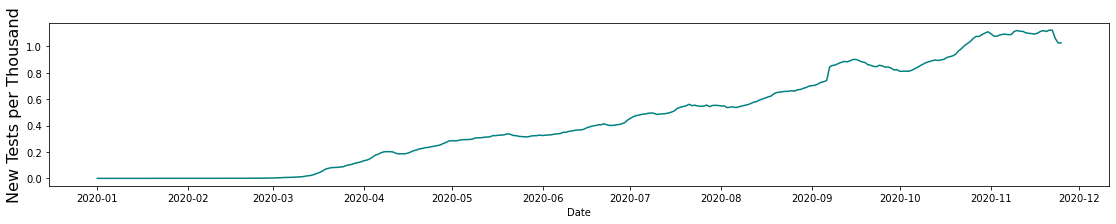

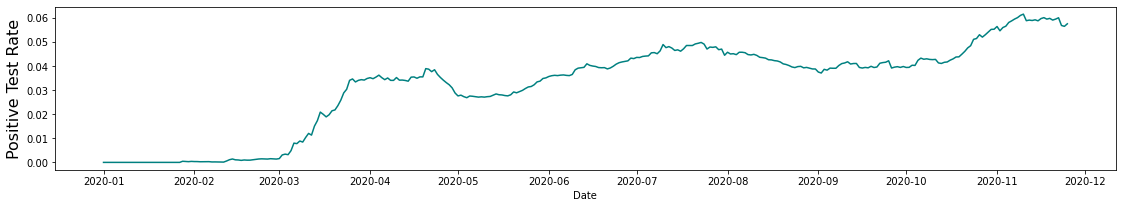

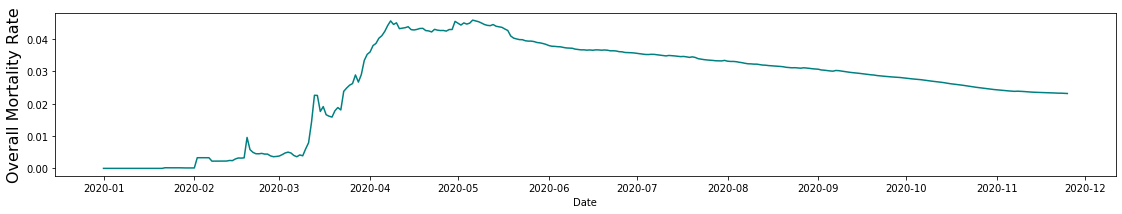

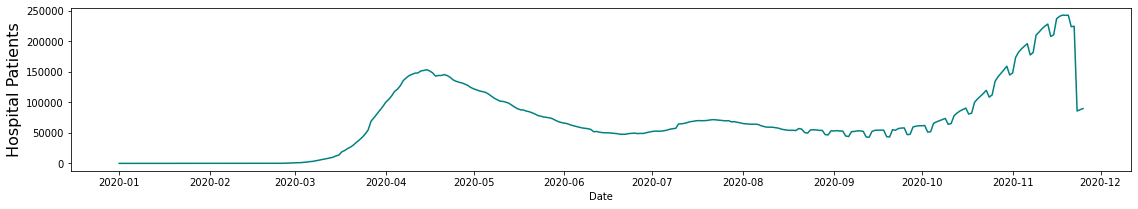

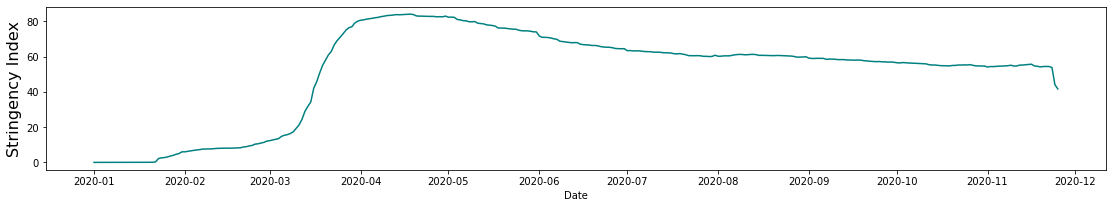

In [57]:
plt.figure(figsize=(19,3))
plt.xlabel(None)
cases = sns.lineplot(x='Date', y='new_cases_smoothed_per_million', data = df_world_summary, color='teal').set_ylabel('New Cases per Million', fontsize=16)
print(cases)
plt.figure(figsize=(19,3))
tests_thou = sns.lineplot(x='Date', y='new_tests_smoothed_per_thousand', data = df_world_summary, color='teal').set_ylabel('New Tests per Thousand', fontsize=16)
print(tests_thou)
plt.figure(figsize=(19,3))
pos_rate = sns.lineplot(x='Date', y='positive_rate', data = df_world_summary,  color='teal').set_ylabel('Positive Test Rate', fontsize=16)
print(pos_rate)
plt.figure(figsize=(19,3))
death_rate = sns.lineplot(x='Date', y='total_fatal_rate', data = df_world_summary,  color='teal').set_ylabel('Overall Mortality Rate', fontsize=16)
print(death_rate)
plt.figure(figsize=(19,3))
hosp_patient = sns.lineplot(x='Date', y='hosp_patients', data = df_world_summary,  color='teal').set_ylabel('Hospital Patients', fontsize=16)
print(hosp_patient)
plt.figure(figsize=(19,3))
str_index = sns.lineplot(x='Date', y='stringency_index', data = df_world_summary,  color='teal').set_ylabel('Stringency Index', fontsize=16)
print(str_index)

Looking at these charts, there appears to be some good news and bad news. 

The bad news: 
* The number of cases per million hit a record high in early November.
* The number of patients in hospitals hit a record high mid-November. 
* The positive tests rate has been increasing throughout the pandemic. Typically, countries that have a high positive rate are overwhelmed by cases and do not have enough tests. 

The good news:
* Testing rates are on the rise.
* The mortality rate is falling and has been since May. This will continue to be monitored with the recent case and hospitalization spike.



### Mortality Rate by Country

A scatterplot is used below to convey several things for each country: total cases, total deaths, mortality rate, continent, and total cases. I chose this method for investigating mortality rate because it is an intuitive approach that directly utilizes the total case and deaths data as well as showing continent patterns.  

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


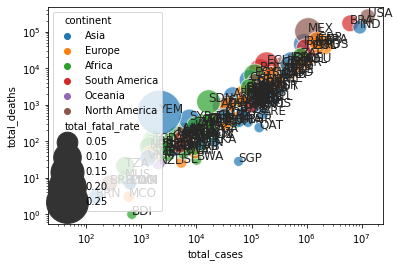

In [58]:
sns.scatterplot(data=df_most_recent_day, x='total_cases', y='total_deaths', size="total_fatal_rate", sizes=(100,2000), alpha=.7,hue='continent')
sns.set(rc={'figure.figsize':(25,15)})

plt.yscale("log")
plt.xscale("log")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(df_most_recent_day.total_cases, df_most_recent_day.total_deaths, df_most_recent_day.iso_code, plt.gca()) 

plt.show()

The scatterplot conveys the expected positive correlation between total cases and total number of deaths. Each point represents a country. From the scatterplot, information on the mortality rate can be interpreted. Countries with higher deaths in comparison to cases are found towards the top part of the cluster when it is looked at horizontally. These countries have a higher mortality rate. Likewise, countries on the bottom of the diagonal have a lower mortality rate (more cases and less deaths). This information is also presented with the point size channel.

Below are a few key observations from the plot:
* Yemen has the highest overall mortality rate. However, Yemen has not reported much testing, cases, or death data.
* Burundi, Egypt, and Qatar have the reportedly lowest mortality rate.
* The United States has the most total cases. 
* Fiji has the least total cases.
* The United States, Brazil, and India have the highest number of total deaths, but are not among the countries with the highest mortality rates. 
* Most of Europe has a very similar mortality rate. 

Countries of interest: 
* United States, Brazil, India   


### Correlation Matrix - Containment Measures

The dataset contains data for the stringency index as well as information on the specific measures taken that are considered when deciding on the stringency index. In order to investigate any potential correlation between these measures and cases, deaths, and mortality rate, a correlation plot can be utilized. Some unnecessary columns are dropped in order to reduce the size of the correlation plot and bring to focus on the COVID-19 containment measures. 

In [59]:
df_country_mean_cor_stringency=df_country_summary.drop(['icu_patients_per_million','E4_International support','H5_Investment in vaccines','ContainmentHealthIndex','ConfirmedCases','hosp_patients_per_million','ConfirmedDeaths','StringencyLegacyIndex','GovernmentResponseIndex','EconomicSupportIndex','total_cases','new_deaths','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','weekly_icu_admissions','total_tests_per_thousand','population','population_density','median_age','aged_65_older','aged_70_older','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index',"M1_Wildcard","StringencyIndexForDisplay","StringencyLegacyIndexForDisplay","GovernmentResponseIndexForDisplay","ContainmentHealthIndexForDisplay","EconomicSupportIndexForDisplay","reproduction_rate","icu_patients","hosp_patients","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","total_tests","new_tests",'new_cases','new_cases_smoothed','total_deaths','new_cases_per_million','new_deaths_per_million','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','new_fatal_rate'], axis=1)
#df_country_mean_cor_stringency

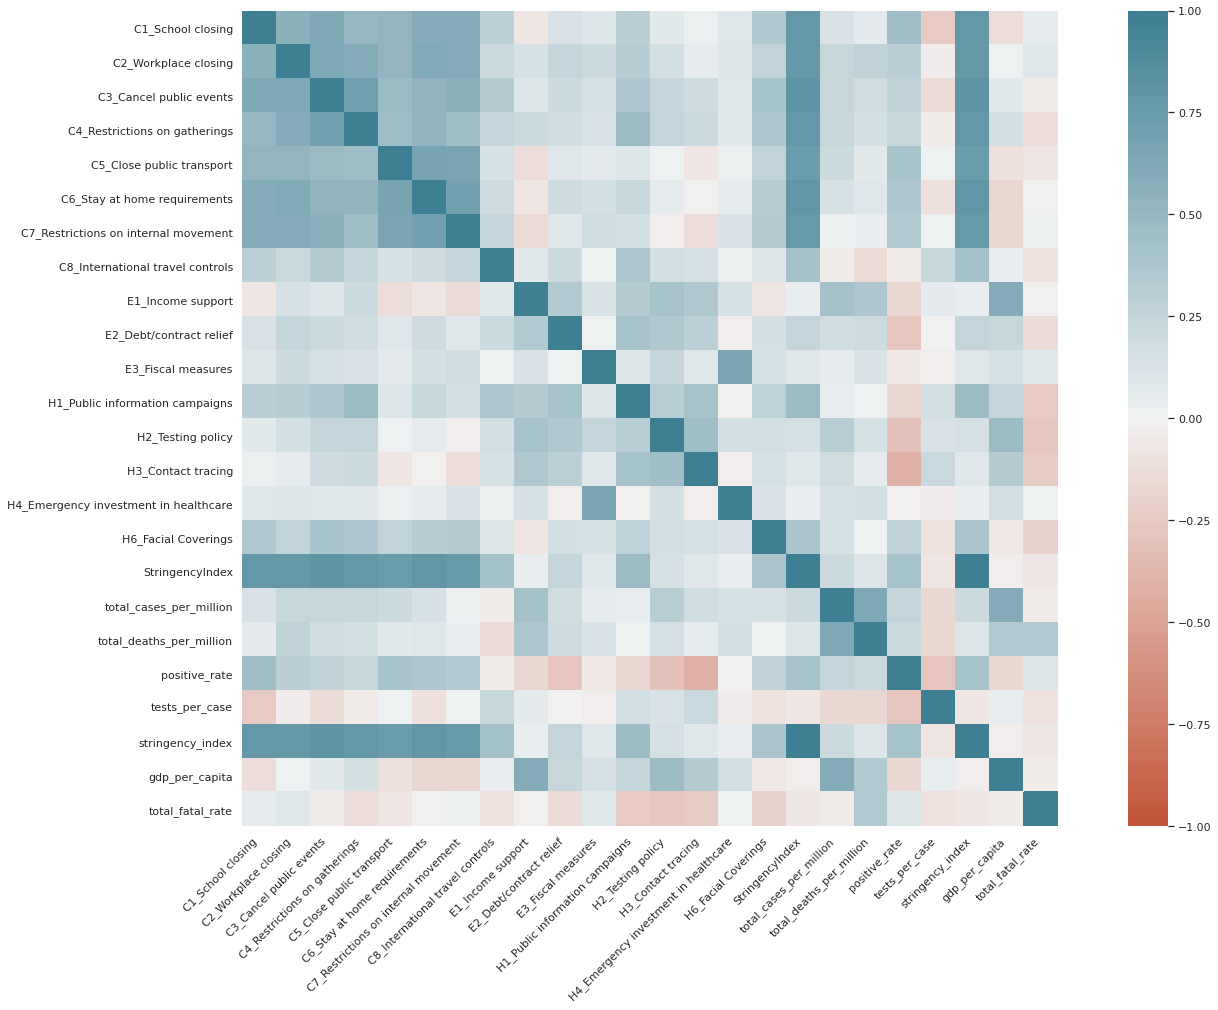

In [60]:
corr = df_country_mean_cor_stringency.corr()
ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True
)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);


From the correlation plot, some areas of interest were identified and examined more in the pairgrid below. Not all combinations of variables need to or should be considered so a pairgrid is a better option. 

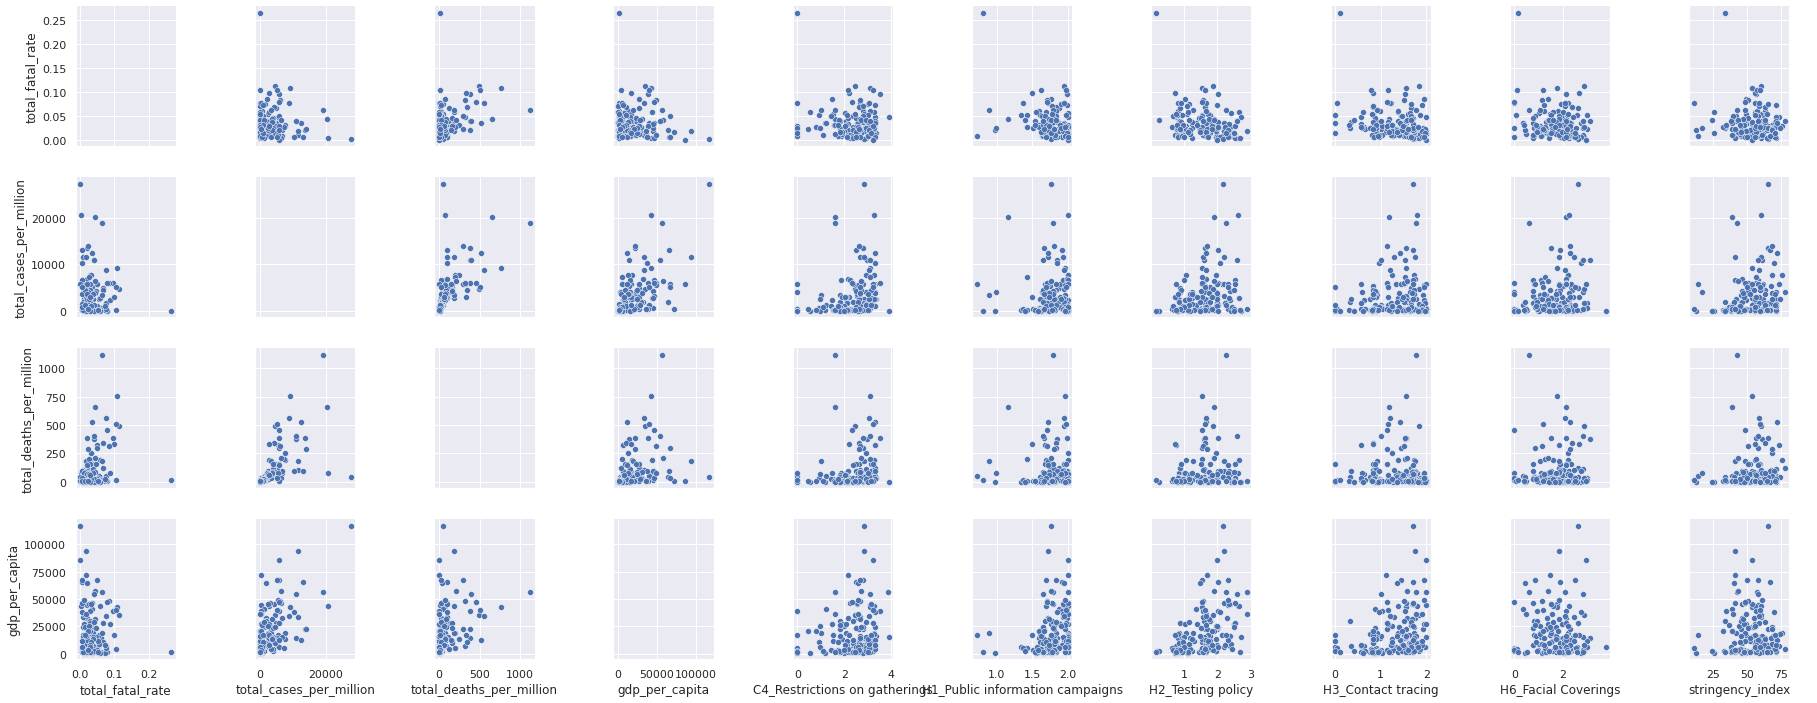

In [61]:
x_vars = ['total_fatal_rate','total_cases_per_million','total_deaths_per_million','gdp_per_capita','C4_Restrictions on gatherings','H1_Public information campaigns','H2_Testing policy','H3_Contact tracing','H6_Facial Coverings','stringency_index']
y_vars = ['total_fatal_rate','total_cases_per_million','total_deaths_per_million','gdp_per_capita']

g = sns.PairGrid(df_country_mean_cor_stringency, x_vars=x_vars, y_vars=y_vars)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Restrictions on gatherings, more open/available testing, contact tracing, and facial coverings either seem to be slightly positively correlated to or show little correlation with deaths and cases. While this is not a favorable finding, the correlations are weak and unconvincing. Also, the measures like encouraging face coverings and restricting group sizes are not an indication of actual public adoption of the measures. More data and studies are needed to determine the effectiveness of different governmental containment measures. 

# Country Analysis

Throughout the report, countries were identified as countries of interest based on findings from the visualizations. Some of those countries did not have enough data to examine deeper and were dropped. The remaining countries of interest will be individually investigated.

## Key Countries

In [62]:
countries_of_interest=[ 'Belgium', 'Italy', 'Luxembourg', 'Denmark', 'Iceland', 'Chile', 'Australia',  'United States']
df_countries_of_interest = df[df.Country.isin(countries_of_interest)]
df_countries_of_interest_most_recent_day = df_most_recent_day[df_most_recent_day.Country.isin(countries_of_interest)]

In [63]:
fig = px.line(df_countries_of_interest, x='Date', y='new_cases_smoothed_per_million', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

fig = px.line(df_countries_of_interest, x='Date', y='new_tests_smoothed_per_thousand', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

fig = px.line(df_countries_of_interest, x='Date', y='positive_rate', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

fig = px.line(df_countries_of_interest, x='Date', y='total_fatal_rate', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

fig = px.line(df_countries_of_interest, x='Date', y='hosp_patients', color="Country", hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()

fig = px.line(df_countries_of_interest, x='Date', y='stringency_index', color='Country', hover_name="Country")
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)
fig.show()


fig = px.bar(df_countries_of_interest_most_recent_day, x='Country', y='population_density')
fig.update_traces(marker_color='teal')
fig.show()

fig = px.bar(df_countries_of_interest_most_recent_day, x='Country', y='aged_65_older')
fig.update_traces(marker_color='teal')
fig.show()

fig = px.bar(df_countries_of_interest_most_recent_day, x='Country', y='extreme_poverty')
fig.update_traces(marker_color='teal')
fig.show()




**Australia**

Australia has reported very few cases per million, a slower increase in tests administered, and very low positive test rate. The fatality rate has been increasing. As of November, Australia’s fatality rate is higher than any other country on the countries of interest list. The country has also had a moderate but consistent stringency index (50 to 80). Something that may be contributing to Australia’s low case number is its very low population density which is the lowest of all the countries that made the countries of interest list.

**Belgium**

Belgium made the countries of interest list due to its recent spike in cases per million. During this spike, there is also a spike in new tests per day which could contribute to more cases being diagnosed or discovered. The positive rate also increased significantly during the same time. This could mean that the virus is spreading faster than tests can be made available. Thankfully, Belgium’s mortality rate has been on the decline since May. A slight recent increase in mortality rate in November will need to continue to be monitored to evaluate the impacts on the recent spike in cases. The stringency index points at another potential reason for the recent problems in Belgium. The restrictions may have been lifted too quickly. Restrictions continued to be lifted until mid-October, but at that point cases and hospitalizations were already on the rise. 

**Chile**

Chile made the list of countries of interest because as of late November the stringency index is one of the highest in the world. Chile saw its initial spike in cases in May, notably later than most counties. However, Chile implemented its first restrictions in mid-March. It should be noted that the spike of positive test rate Chile experienced during the initial spike in cases reached an over 35% positive rate. This could indicate testing was limited and the case numbers are under their actual values. Chile chose not to reduce restrictions and has get to get another surge of cases. 
Denmark has significantly invested in increasing testing since August and was moderate in the government restrictions with a maximum stringency index of 72 in March dropping to 40 in early November. November has marked a slight increase in cases per million per day, up to 209 as of November 24th, but has been plateaued near that number for all of November. 

**Iceland**

As of November 24th, Iceland seems to have been managing the pandemic well with consistently low cases, increases in testing at the sign of increased spread, a consistent positive test rate, and one of the lowest fatality rates. Iceland has chosen to place less containment restrictions with a stringency index from March to November staying within the range of 54 and 30. Iceland’s very low population density may be part of the reason for its success. 

**Italy**

Italy’s initial spike in cases not only impacted a larger proportion of people than many similar countries, but the spike came earlier than most other countries. Some other factor than may have contributed to Italy’s high case numbers and mortality rate early one are its older population, rapid increase in hospitalized patients, and high population density. 

**Luxembourg**

Luxembourg took the approach of more testing and a quick reduction in restrictions. As of late March, Luxembourg had a stringency index of nearly 80, but this number dropped to 11.11 by mid-July. This stringency index has since increased back to 56 as of November 14th, potentially due to its spike in cases starting in early October. However, cases had been low up until that point and hospitals have reportedly admitted very few COVID-19 patients throughout the pandemic. This is despite a population density slightly higher than Italy’s. There is a potential that the recent spike in cases only appears to mean Luxembourg is struggling more than other countries since its high amount of testing may just be catching more cases that other countries are missing within their own populations due to less testing. 

**United States**

The United States has seen moderate testing but a positive test rate consistently above the top end of the cluster of countries, potentially indicating a need for more testing. Also, while most countries saw a spike in hospitalizations at the beginning of the pandemic and another approaching November, the United States has seen multiple spikes so far, one with a peak in mid-April, another in July, and one still increasing as of November 24th. The stringency index has been much more consistent than many other countries, ranging from 73 to 62.5. Despite this, the United States have been climbing numbers each week since September 13th. 15% of United States citizens are above the age of 65 years old. For comparison, Italy’s percentage of people older than 65 years old is 23%. 


# Conclusion

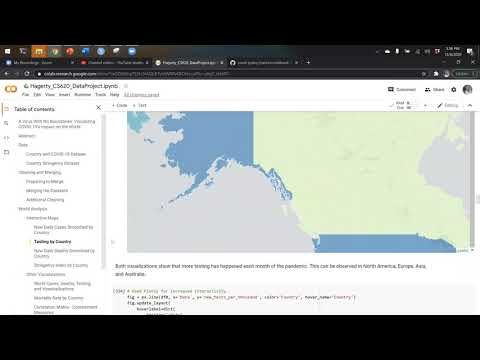

In [64]:
from IPython.display import YouTubeVideo
YouTubeVideo('f9LZ1Y7eJ-Y')

As a reminder, the goals of this project included:
* Creating interactive world maps and line charts to investigate daily cases, death, and stringency index by country.
* Describing the world trends in cases, deaths, and stringency index. Noting any interesting country specific trends. 
* Creating a scatterplot to intuitively show mortality rate.
* Identifying countries of interest throughout exploration to investigate towards the end of the report.
* Considering potential correlations between government intervention and lower cases, deaths, or death rates.
* Hypothesizing some potential reasons for the COVID-19 impact on each identified country of interest.

Throughout the project, world and country key data was visualized to show the spread of COVID-19, the virus with no boundaries. With these visualizations each country was observed throughout the pandemic, from the first cases, to government intervention, to testing, and mortality rates. The global maps also gave insights in how continents faced and dealt with the virus differently. While a conclusion could not be drawn on what government measures, if any, seem to be most effective in controlling the spread, specific countries of interest were investigated to look for potential explanations for their pandemic experience.



## Further Analysis

* As discussed, predictor data that influenced the stringency index is only based off the level of government recommendation and requirement policies, not actual abiding of any policies. Additional studies with data on actual abidance of specific policy categories could provide a better indication of success. 
* Since this data included countries rather than individuals, the health and age-related data could only provide additional country insight, not be relied upon to describe individuals. Future projects could include machine learning with actual COVID-19 patients to predict the outcome of individuals given age and health factors. 
* This project is being finalized in mid-November when COVID-19 cases in many areas around the world are spiking once again. Importing more recent data will inevitably provide more information to be analyzed.


# Resources

https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker#data

https://ourworldindata.org/coronavirus

https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/

https://stackoverflow.com/questions/14032521/python-data-structure-sort-list-alphabetically

https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

https://github.com/googlecolab/jupyter_http_over_ws

https://towardsdatascience.com/3-lines-of-python-code-to-create-an-interactive-playable-covid-19-bubble-map-74807939e887

https://datatofish.com/strings-to-datetime-pandas/

https://www.geeksforgeeks.org/python-convert-set-into-a-list/

https://docs.tibco.com/pub/enterprise-runtime-for-R/5.0.0/doc/html/Language_Reference/base/merge.html

https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func

https://medium.com/@lindsayrallen1/interactive-choropleth-map-of-washington-dc-using-folium-and-python-2794708514d5

https://diegoquintanav.github.io/folium-barcelona-EN.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

https://plotly.com

